# Introduction to Deep Learning

## Deep Feed-forward Networks

Deep feedforward networks, also often called feedforward neural networks, or multilayer perceptrons(MLPs). 
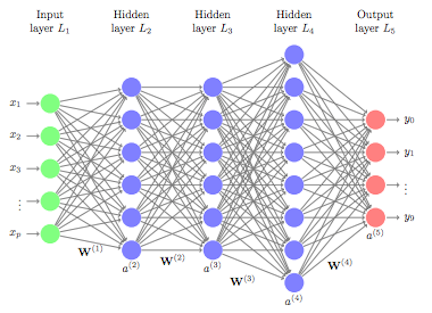
<font size= 1>image source: http://uc-r.github.io/public/images/analytics/deep_learning/deep_nn.png</font>

The feedforward neural network is one of the most basic artificial neural networks (ANN). It is an extended version of perceptron with additional hidden nodes between the input and the output layers. In this network, data moves in the only forward direction without any cycles or loops.

### Neuron
Each node in the layer is a Neuron, which can be thought of as the basic processing unit of a Neural Network.A schematic diagram of a neuron is given below.
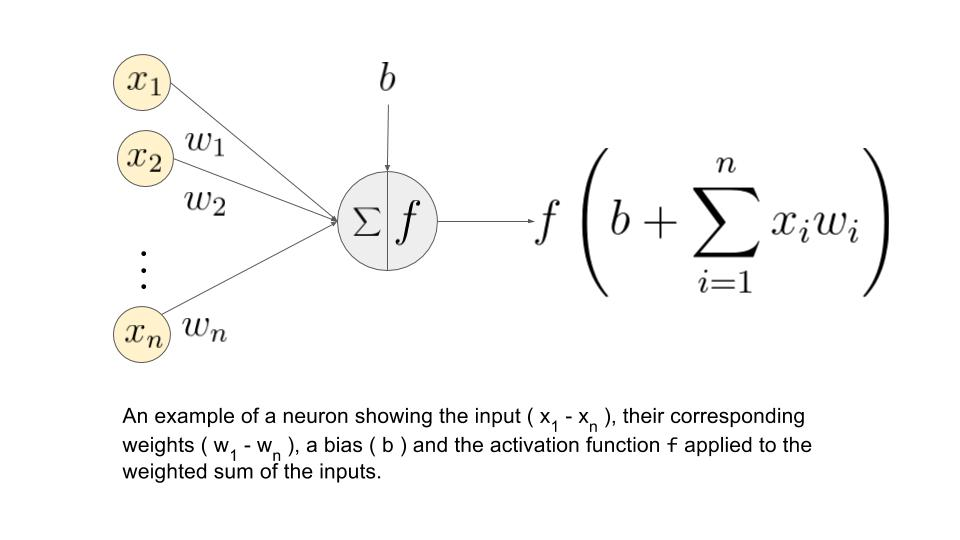
<font size= 1>image source: https://www.learnopencv.com/wp-content/uploads/2017/10/neuron-diagram.jpg</font>

It works in two steps – It calculates the weighted sum of its inputs and then applies an activation function to normalize the sum. The activation functions can be linear or nonlinear. Also, there are weights associated with each input of a neuron. These are the parameters which the network has to learn during the training phase.

### Activation Functions

The activation function is used as a decision making body at the output of a neuron. The neuron learns Linear or Non-linear decision boundaries based on the activation function. It also has a normalizing effect on the neuron output which prevents the output of neurons after several layers to become very large, due to the cascading effect. 

There are three most widely used activation functions.

#### Rectified Linear Unit (ReLU)
It allows only positive values to pass through it. The negative values are mapped to zero.
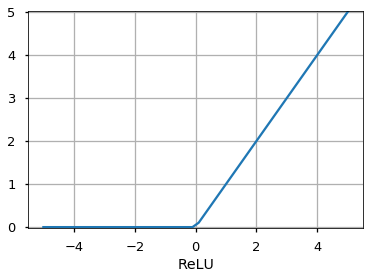
<font size=1>https://www.learnopencv.com/wp-content/uploads/2017/10/relu.png</font>


#### Sigmoid 
It maps the input ( x axis ) to values between 0 and 1.
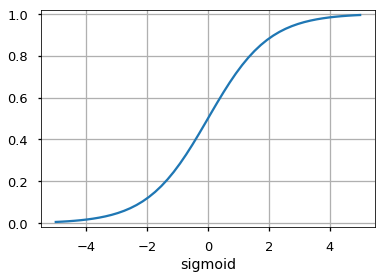
<font size=1>https://www.learnopencv.com/wp-content/uploads/2017/10/sigmoid.png</font>

#### Tanh
It is similar to the sigmoid function butmaps the input to values between -1 and 1.
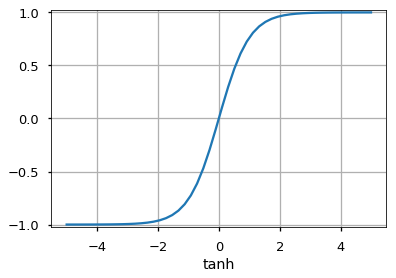
<font size=1>https://www.learnopencv.com/wp-content/uploads/2017/10/tanh.png</font>

More activation fucntions can be found at https://en.wikipedia.org/wiki/Activation_function.




## Building a Deep Feed-forward Network

### Fashion MNIST Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Each training and test example is assigned to one of the following labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

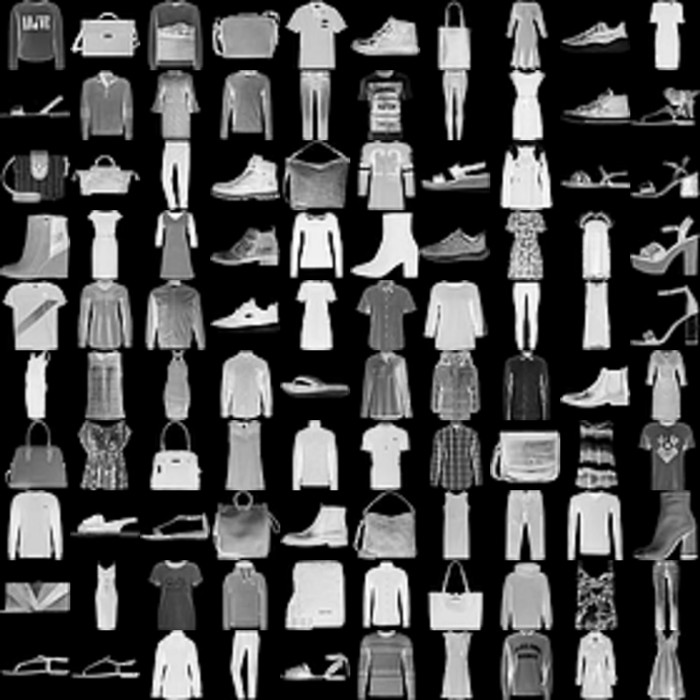
<font size=1> image source: https://miro.medium.com/max/700/1*QQVbuP2SEasB0XAmvjW0AA.jpeg </font>

Our goal is building a neural network using Pytorch and then training the network to predict clothes. This trained network will return a probability for 10 classes of clothes shown in images.


We will do the following steps in order:

1. Load and normalize the training and test datasets
2. Define a Neural Network
3. Define a loss function and an optimizer
4. Train the network
5. Test the network using the test data

In [9]:
pip install torchvision

### 1. Load and normalize the training and test datasets

In [10]:
# import libraries
import torch
import torch.nn as nn
import torch.optim as optim  
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# define a transform to convert images to tensor and normalize
transform=transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5), (0.5))])

# FashionMNIST is a dataset inside the torchvision libary
# load the data: train and test sets
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)

Failed to download (trying next):
<urlopen error [Errno 11001] getaddrinfo failed>



RuntimeError: Error downloading train-images-idx3-ubyte.gz

In [ ]:
# Explore data
print(type(trainset.data))
print(trainset.data.size())
print(testset.data.size())
print(testset.classes)
print(testset.targets)

In [ ]:
# Prepare validation set
num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(0.2 * num_train)) # to get 20% of the train set
np.random.seed(0)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [ ]:
# data loader

# load the trainset
trainloader = torch.utils.data.DataLoader(trainset, sampler=train_sampler, batch_size=64)
# load the validset
validloader = torch.utils.data.DataLoader(trainset, sampler=valid_sampler, batch_size=64)
# load the testset
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
len(trainloader.sampler)

In [ ]:
len(validloader.sampler)

In [ ]:
# Show some images and labels in the training batch
dataiter = iter(trainloader)
images, labels = dataiter.next()  

plt.gray()
plt.figure(figsize = (10, 10))

for i in range(16):
    img = images[i]
    plt.subplots_adjust(.4)
    plt.subplot(4, 4, i+1)
    plt.title(testset.classes[labels[i]])
    plt.imshow(np.squeeze(img))

### 2. Define a neural network

The input images are 28x28 2D tensors, we need to convert them into 1D vectors. 28 times 28 is 784, this is called flattening, we flattened the 2D images into 1D vectors. This is our input layer and here we need to 10 output layers for the classification of the clothes.

While we are defining the hidden layers, we are able to choose the arbitrary number. But this selection directly affects our neural network performance. We should modify the number to find out an optimized model for our image classification problem.

Let us build a network with thte following layers:

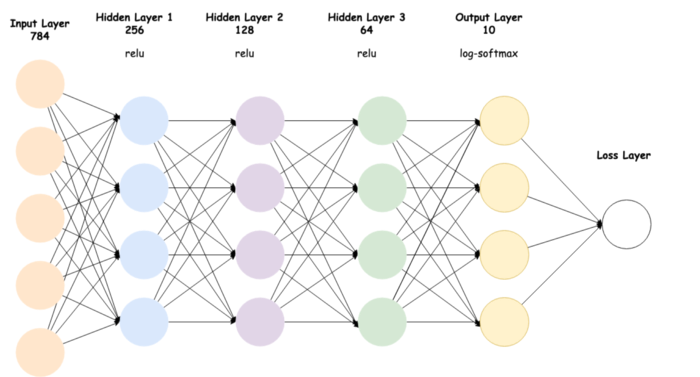
<font size=1> image source: https://miro.medium.com/max/700/1*2SHOuTUK51_Up3D9JMAplA.png </font>



In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()    

        #linear transformation, y=wx+b, with 784 inputs and 256 outputs 
        self.fc1 = nn.Linear(784, 256)  
        #linear transformation, y=wx+b, with 256 inputs and 128 outputs 
        self.fc2 = nn.Linear(256, 128)
        #linear transformation, y=wx+b, with 128 inputs and 64 outputs 
        self.fc3 = nn.Linear(128, 64) 
        #linear transformation, y=wx+b, with 64 inputs and 10 outputs 
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # change input shapes to our batch size
        x = x.view(x.shape[0], -1)  # [64, 1, 28, 28] --> [64, 784]
        # goes through the hidden layer with ReLU activation function
        x = torch.relu(self.fc1(x)) # then reassign it to the x
        x = torch.relu(self.fc2(x)) 
        x = torch.relu(self.fc3(x))
        # output layer
        #pass through the Log Softmax function to obtain the log-probabilities
        x = torch.log_softmax(self.fc4(x),dim=1) 
        return x

model = Net() # create the model

### 3. Define a loss function and an optimizer

Let us use Negative Log-likelihood loss and SGD.

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 4. Train the network

In [6]:
# train the network

epochs = 5  # modify the number of epochs to further train the network
train_losses = np.zeros(epochs)
valid_losses = np.zeros(epochs)


for epoch in range(epochs):  # loop over the dataset multiple times
    model.train()
    train_loss = []     
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward propagation
        outputs = model(inputs)
        
        # loss calculation
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # weight optimization
        optimizer.step()

        train_loss.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        valid_loss = []
        for data in validloader:
            # get the validset; data is a list of [inputs, labels]
            inputs, labels = data
       
            # forward propagation
            outputs = model(inputs)
        
            # loss calculation
            loss = criterion(outputs, labels)
        
            valid_loss.append(loss.item())
            
    # print statistics
    train_loss = np.mean(train_loss)
    valid_loss = np.mean(valid_loss)
    
    print( 'Epoch [%d] train loss: %.3f  valid loss: %.3f' %
         (epoch + 1, train_loss, valid_loss ))
    
    # save losses
    train_losses[epoch] = train_loss
    valid_losses[epoch] = valid_loss
print('Finished Training')


NameError: name 'model' is not defined

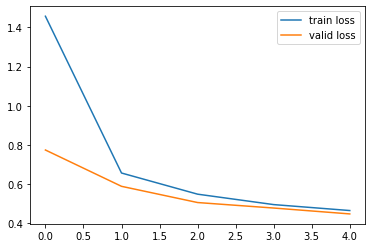

In [68]:
# Plot the train loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(valid_losses, label='valid loss')
plt.legend()
plt.show()

### 5. Test the network using the test data

In [69]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        # forward pass
        outputs = model(images)
        
        # get prediction
        # torch.max returns both max and argmax
        # dim = 0 max along columns
        # dim = 1 max along rows
        _, predicted = torch.max(outputs.data, dim=1)
        
         # update counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
                                                   100 * correct / total))

Accuracy of the network on the test images: 82 %


In [70]:
# get all predictions in an array p_test 
y_test = np.array(testset.targets)
p_test = np.array([])

model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Forward pass
        outputs = model(images)

        # Get prediction
        # torch.max returns both max and argmax
        _, predictions = torch.max(outputs, 1)
  
        # update p_test
        p_test = np.concatenate((p_test, predictions.numpy()))

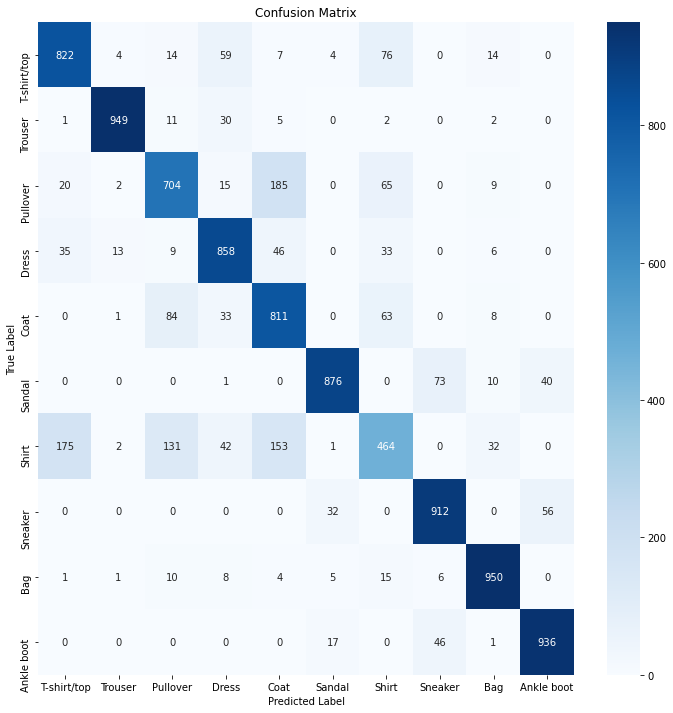

In [71]:
# plot confusion matrix        
cm = confusion_matrix(y_test, p_test)
#print(cm)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix")
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
ax.set(ylabel="True Label", xlabel="Predicted Label")
ax.set_xticklabels(testset.classes)
ax.set_yticklabels(testset.classes)
plt.show()

In [3]:
# Show some misclassified examples
p_test = p_test.astype(np.uint8) # convert to unsigned integer type
x_test = testset.data
y_test = np.array(testset.targets)

plt.figure(figsize=(20,10))
j=1 
misclassified = np.where(p_test != y_test)[0][:16]
for i in misclassified:
    img = x_test[i]
    plt.axis('off')
    plt.subplot(4,4,j)
    plt.title("%d) True label: %s , Predicted: %s" % (i, testset.classes[y_test[i]], testset.classes[p_test[i]]))
    plt.imshow(img)   
    j+=1

NameError: name 'p_test' is not defined

In [2]:
testset.data

NameError: name 'testset' is not defined

In [73]:
# save the model
PATH='./FashionMNIST-1.pth'
torch.save(model.state_dict(), PATH)

## Regularization for Deep Learning

Deep neural networks are prone to overfitting because of their flexibility in memorizing the patterns in the training set, instead of generalizing to unseen data.

We say a particular algorithm overfits when it performs well on the training dataset but fails to perform on unseen or validation and test datasets. This mostly occurs due to the algorithm identifying patterns that are too specific to the training dataset. In simpler words, we can say that the algorithm figures out a way to memorize the dataset so that it performs really well on the training dataset and fails to perform on the unseen data. 
 
Any modiﬁcation we make to a learning algorithm that is intended to reduce its generalization error but not its training error is called regularization.

We will discuss the following regularization techniques:

### L2 Regularization

L2 is the most common type of regularization. It update the general cost function by adding another term known as the regularization term. Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.

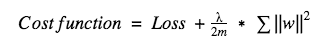

Here, lambda is the regularization parameter. It is the hyperparameter whose value is optimized for better results. L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).

In PyTorch, the parameter `weight_decay` of some optimizers is the L2 regular item. The default value is 0.

Example on SGD optimizer:

`optimizer = torch.optim.SGD(model.parameters, lr=0.01, weight_decay=0.001)`

Let us apply the `weight_decay` to the above Fashion MNIST network.

In [74]:
# import libraries
import torch
import torch.nn as nn
import torch.optim as optim  
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# define a transform to convert images to tensor and normalize
transform=transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5), (0.5))])

#Load the data: tran and test sets
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)

# Prepare validation set
num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(0.2 * num_train)) # to get 20% of the train set
np.random.seed(0)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# data loader
# load the trainset
trainloader = torch.utils.data.DataLoader(trainset, sampler=train_sampler, batch_size=64)
# load the validset
validloader = torch.utils.data.DataLoader(trainset, sampler=valid_sampler, batch_size=64)
# load the testset
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
    
        #linear transformation, y=wx+b, with 784 inputs and 256 outputs 
        self.fc1 = nn.Linear(784, 256)  
        #linear transformation, y=wx+b, with 256 inputs and 128 outputs 
        self.fc2 = nn.Linear(256, 128)
        #linear transformation, y=wx+b, with 128 inputs and 64 outputs 
        self.fc3 = nn.Linear(128, 64) 
        #linear transformation, y=wx+b, with 64 inputs and 10 outputs 
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # change input shapes to our batch size
        x = x.view(x.shape[0], -1)  # [64, 1, 28, 28] --> [64, 784]
        # goes through the hidden layer with ReLU activation function
        x = torch.relu(self.fc1(x)) # then reassign it to the x
        x = torch.relu(self.fc2(x)) 
        x = torch.relu(self.fc3(x))
        # output layer
        #pass through the Log Softmax function to obtain the log-probabilities
        x = torch.log_softmax(self.fc4(x),dim=1) 
        return x

model = Net() # create the model



#### Apply `weight_decay`

In [75]:
# define the loss function and optimizer with weight_decay
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0001)

#### Train the network

In [76]:
# train the network

epochs = 10  # modify the number of epochs to further train the network
train_losses = np.zeros(epochs)
valid_losses = np.zeros(epochs)

for epoch in range(epochs):  # loop over the dataset multiple times
    model.train()
    train_loss = []     
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward propagation
        outputs = model(inputs)
        
        # loss calculation
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # weight optimization
        optimizer.step()

        train_loss.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        valid_loss = []
        for data in validloader:
            # get the validset; data is a list of [inputs, labels]
            inputs, labels = data
       
            # forward propagation
            outputs = model(inputs)
        
            # loss calculation
            loss = criterion(outputs, labels)
        
            valid_loss.append(loss.item())
            
    # print statistics
    train_loss = np.mean(train_loss)
    valid_loss = np.mean(valid_loss)
    
    print( 'Epoch [%d] train loss: %.3f  valid loss: %.3f' %
         (epoch + 1, train_loss, valid_loss ))
    
    # save losses
    train_losses[epoch] = train_loss
    valid_losses[epoch] = valid_loss
print('Finished Training')


Epoch [1] train loss: 1.518  valid loss: 0.768
Epoch [2] train loss: 0.663  valid loss: 0.615
Epoch [3] train loss: 0.562  valid loss: 0.530
Epoch [4] train loss: 0.511  valid loss: 0.489
Epoch [5] train loss: 0.478  valid loss: 0.476
Epoch [6] train loss: 0.454  valid loss: 0.447
Epoch [7] train loss: 0.434  valid loss: 0.470
Epoch [8] train loss: 0.420  valid loss: 0.415
Epoch [9] train loss: 0.405  valid loss: 0.404
Epoch [10] train loss: 0.394  valid loss: 0.420
Finished Training


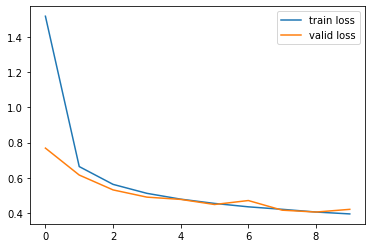

In [77]:
# Plot the train loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(valid_losses, label='valid loss')
plt.legend()
plt.show()

#### Test the network on the test data

In [78]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        # forward pass
        outputs = model(images)
        
        # get prediction
        # torch.max returns both max and argmax
        # dim = 0 max along columns
        # dim = 1 max along rows
        _, predicted = torch.max(outputs.data, dim=1)
        
         # update counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
                                                   100 * correct / total))

Accuracy of the network on the test images: 83 %


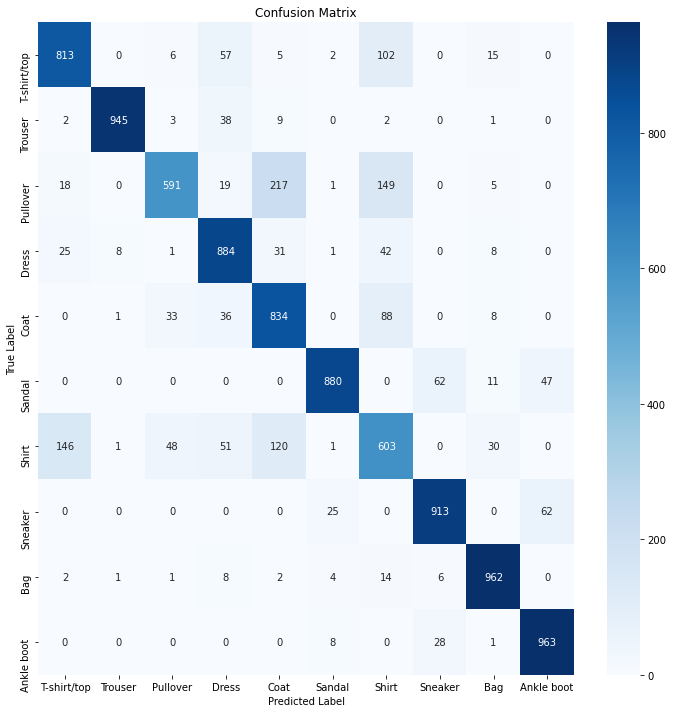

In [79]:
# get all predictions in an array p_test 
y_test = np.array(testset.targets)
p_test = np.array([])

model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Forward pass
        outputs = model(images)

        # Get prediction
        # torch.max returns both max and argmax
        _, predictions = torch.max(outputs, 1)
  
        # update p_test
        p_test = np.concatenate((p_test, predictions.numpy()))
        
# plot confusion matrix        
cm = confusion_matrix(y_test, p_test)
#print(cm)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix")
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
ax.set(ylabel="True Label", xlabel="Predicted Label")
ax.set_xticklabels(testset.classes)
ax.set_yticklabels(testset.classes)
plt.show()

In [80]:
# save the model
PATH='./FashionMNIST-L2reg.pth'
torch.save(model.state_dict(), PATH)

### Dataset Augmentation

Dataset augmentation is a process of generating data artificially from the existing training data by doing minor changes like rotation, flips, scaling, shifting, adding blur to some pixels in the original image, etc. Augmenting with more data will make it harder for the neural network to drive the training error to zero.
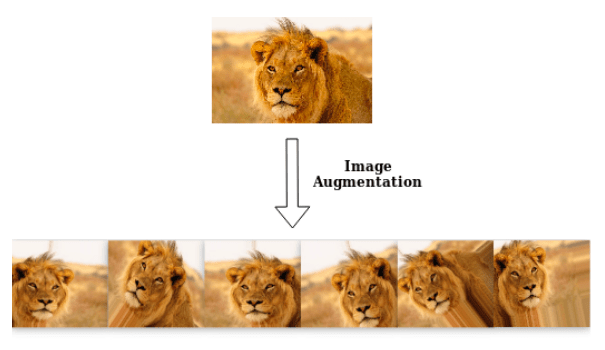
<font size=1>image source: https://miro.medium.com/max/605/0*Utma-dS47hSoQ6Zt</font>

By generating more data, the network will have a better chance of performing better on the test data. Depending on the task at hand, we might use all the augmentation techniques and generate more training data.

In PyTorch, we can use the `transforms` class in `torchvision` to augement data. Here is an example:

```transform = torchvision.transforms.Compose([       
       torchvision.transforms.Resize(256),
       torchvision.transforms.RandomCrop(224),
       torchvision.transforms.ColorJitter(brightness=0.5),
       torchvision.transforms.RandomHorizontalFlip(p=0.5),
       torchvision.transforms.RandomVerticalFlip(p=0.05),
       torchvision.transforms.RandomRotation(degrees=45),
       torchvision.transforms.RandomGrayScale(p=0.2),
       torchvision.transforms.ToTensor()       
])```

See https://pytorch.org/docs/stable/torchvision/transforms.html for more information.

Let us apply the data augmentation to the Fashion MNIST network.

In [81]:
# import libraries
import torch
import torch.nn as nn
import torch.optim as optim  
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#### Dataset Augmentation

In [82]:
# define a transform to convert images to tensor and normalize
transform=transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5), (0.5))])
# dataset augmentation
train_transform = transforms.Compose([
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomVerticalFlip(p=0.05),
                                transforms.RandomRotation(degrees=45),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])

#Load the data: tran and test sets
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=train_transform)
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)

In [83]:
# Prepare validation set
num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(0.2 * num_train)) # to get 20% of the train set
np.random.seed(0)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# data loader
# load the trainset
trainloader = torch.utils.data.DataLoader(trainset, sampler=train_sampler, batch_size=64)
# load the validset
validloader = torch.utils.data.DataLoader(trainset, sampler=valid_sampler, batch_size=64)
# load the testset
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Show some images and labels in the training batch

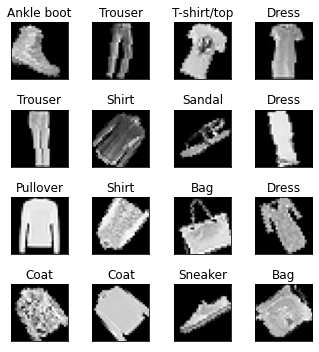

In [84]:
# Show some images and labels in the training batch
dataiter = iter(trainloader)
images, labels = dataiter.next()  

fig = plt.figure(figsize=(5, 5))

#show the first 16 images in the batch
for i in np.arange(16):
    # add_subplot(nrows, ncols, index, **kwargs)
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])  
    img = images[i] / 2 + 0.5  # unnormalize        
    ax.imshow(np.squeeze(img), cmap='gray') #grayscale image
    ax.set_title(testset.classes[labels[i].item()])
    fig.tight_layout()

In [85]:
# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
    

        #linear transformation, y=wx+b, with 784 inputs and 256 outputs 
        self.fc1 = nn.Linear(784, 256)  
        #linear transformation, y=wx+b, with 256 inputs and 128 outputs 
        self.fc2 = nn.Linear(256, 128)
        #linear transformation, y=wx+b, with 128 inputs and 64 outputs 
        self.fc3 = nn.Linear(128, 64) 
        #linear transformation, y=wx+b, with 64 inputs and 10 outputs 
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # change input shapes to our batch size
        x = x.view(x.shape[0], -1)  # [64, 1, 28, 28] --> [64, 784]
        # goes through the hidden layer with ReLU activation function
        x = torch.relu(self.fc1(x)) # then reassign it to the x
        x = torch.relu(self.fc2(x)) 
        x = torch.relu(self.fc3(x))
        # output layer
        #pass through the Log Softmax function to obtain the log-probabilities
        x = torch.log_softmax(self.fc4(x),dim=1) 
        return x

model = Net() # create the model

# define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  

#### Train the network

In [86]:
# train the network

epochs = 10 # modify the number to further train the network
train_losses = np.zeros(epochs)
valid_losses = np.zeros(epochs)


for epoch in range(epochs):  # loop over the dataset multiple times
    model.train()
    train_loss = []     
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward propagation
        outputs = model(inputs)
        
        # loss calculation
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # weight optimization
        optimizer.step()

        train_loss.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        valid_loss = []
        for data in validloader:
            # get the validset; data is a list of [inputs, labels]
            inputs, labels = data
       
            # forward propagation
            outputs = model(inputs)
        
            # loss calculation
            loss = criterion(outputs, labels)
        
            valid_loss.append(loss.item())
            
    # print statistics
    train_loss = np.mean(train_loss)
    valid_loss = np.mean(valid_loss)
    
    print( 'Epoch [%d] train loss: %.3f  valid loss: %.3f' %
         (epoch + 1, train_loss, valid_loss ))
    
    # save losses
    train_losses[epoch] = train_loss
    valid_losses[epoch] = valid_loss
print('Finished Training')


Epoch [1] train loss: 1.884  valid loss: 1.320
Epoch [2] train loss: 1.104  valid loss: 0.967
Epoch [3] train loss: 0.899  valid loss: 0.859
Epoch [4] train loss: 0.817  valid loss: 0.801
Epoch [5] train loss: 0.776  valid loss: 0.769
Epoch [6] train loss: 0.746  valid loss: 0.743
Epoch [7] train loss: 0.719  valid loss: 0.718
Epoch [8] train loss: 0.693  valid loss: 0.693
Epoch [9] train loss: 0.676  valid loss: 0.661
Epoch [10] train loss: 0.659  valid loss: 0.654
Finished Training


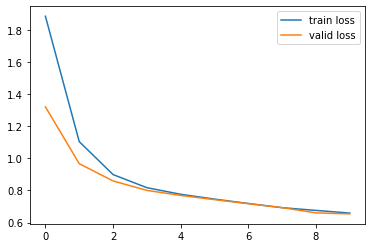

In [87]:
# Plot the train loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(valid_losses, label='valid loss')
plt.legend()
plt.show()

#### Test the network on the test data

In [88]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        # forward pass
        outputs = model(images)
        
        # get prediction
        # torch.max returns both max and argmax
        # dim = 0 max along columns
        # dim = 1 max along rows
        _, predicted = torch.max(outputs.data, dim=1)
        
         # update counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
                                                   100 * correct / total))

Accuracy of the network on the test images: 76 %


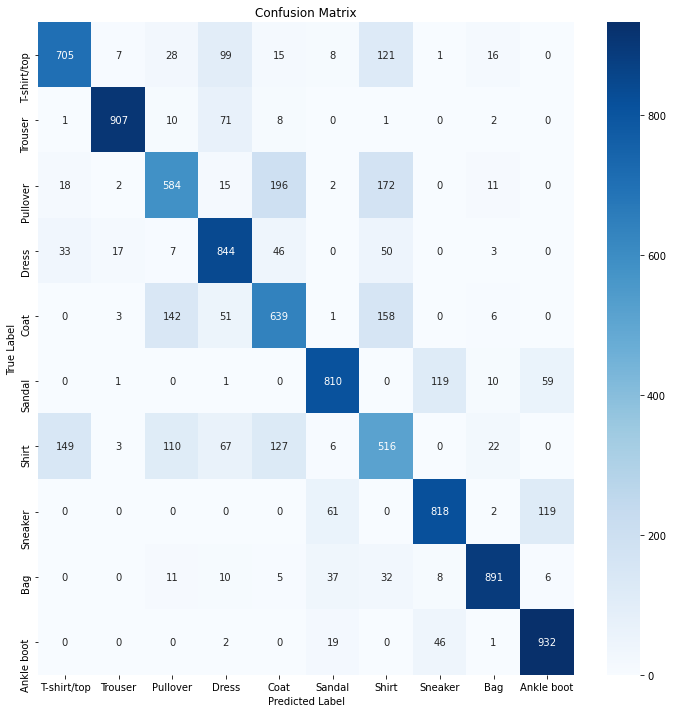

In [89]:
# get all predictions in an array p_test 
y_test = np.array(testset.targets)
p_test = np.array([])

model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Forward pass
        outputs = model(images)

        # Get prediction
        # torch.max returns both max and argmax
        _, predictions = torch.max(outputs, 1)
  
        # update p_test
        p_test = np.concatenate((p_test, predictions.numpy()))
        
# plot confusion matrix        
cm = confusion_matrix(y_test, p_test)
#print(cm)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix")
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
ax.set(ylabel="True Label", xlabel="Predicted Label")
ax.set_xticklabels(testset.classes)
ax.set_yticklabels(testset.classes)
plt.show()

In [90]:
# save the model
PATH='./FashionMNIST-dataAug.pth'
torch.save(model.state_dict(), PATH)

### Dropout

At every iteration, randomly selects some nodes and removes them along with all of their incoming and outgoing connections. So each iteration has a different set of nodes and this results in a different set of outputs. This probability of choosing how many nodes should be dropped is the hyperparameter of the dropout function. Dropout can be applied to the hidden and the input layers.

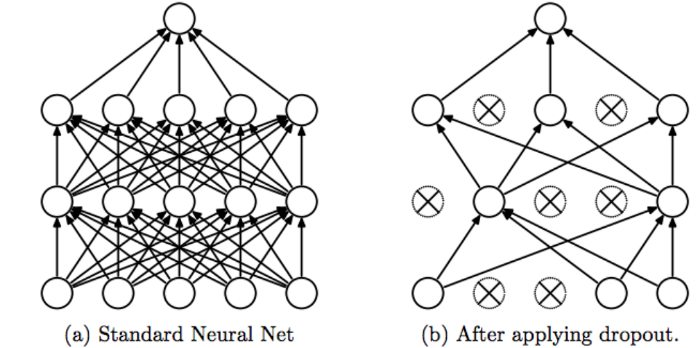
<font size=1>image source: https://miro.medium.com/max/700/1*iWQzxhVlvadk6VAJjsgXgg.png </font>

In PyTorch, we can create dropout layer as follow:

`self.dropout = nn.Dropout(0.2)`

The upper layer drops 20%  of the nodes.

Let us apply dropout to the Fashion MNIST network.

In [91]:
# import libraries
import torch
import torch.nn as nn
import torch.optim as optim  
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# define a transform to convert images to tensor and normalize
transform=transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5), (0.5))])

#Load the data: tran and test sets
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)

# Prepare validation set
num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(0.2 * num_train)) # to get 20% of the train set
np.random.seed(0)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# data loader
# load the trainset
trainloader = torch.utils.data.DataLoader(trainset, sampler=train_sampler, batch_size=64)
# load the validset
validloader = torch.utils.data.DataLoader(trainset, sampler=valid_sampler, batch_size=64)
# load the testset
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

#### Apply Dropout

In [92]:
# define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
    

        #linear transformation, y=wx+b, with 784 inputs and 256 outputs 
        self.fc1 = nn.Linear(784, 256)  
        #linear transformation, y=wx+b, with 256 inputs and 128 outputs 
        self.fc2 = nn.Linear(256, 128)
        #linear transformation, y=wx+b, with 128 inputs and 64 outputs 
        self.fc3 = nn.Linear(128, 64) 
        #linear transformation, y=wx+b, with 64 inputs and 10 outputs 
        self.fc4 = nn.Linear(64, 10)
        #defining a 20% dropout
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # change input shapes to our batch size
        x = x.view(x.shape[0], -1)  # [64, 1, 28, 28] --> [64, 784]
        # goes through the hidden layer with ReLU activation function and dropout
        x = self.dropout(torch.relu(self.fc1(x))) # then reassign it to the x
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.dropout(torch.relu(self.fc3(x)))
        # output layer
        # pass through the Log Softmax function to obtain the log-probabilities
        # not using dropout on output layer
        x = torch.log_softmax(self.fc4(x),dim=1) 
        return x


model = Net() # create the model

# define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  

#### Train the network

In [93]:
# train the network

epochs = 10 # modify the number to further train the network
train_losses = np.zeros(epochs)
valid_losses = np.zeros(epochs)


for epoch in range(epochs):  # loop over the dataset multiple times
    model.train()
    train_loss = []     
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward propagation
        outputs = model(inputs)
        
        # loss calculation
        loss = criterion(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # weight optimization
        optimizer.step()

        train_loss.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        valid_loss = []
        for data in validloader:
            # get the validset; data is a list of [inputs, labels]
            inputs, labels = data
       
            # forward propagation
            outputs = model(inputs)
        
            # loss calculation
            loss = criterion(outputs, labels)
        
            valid_loss.append(loss.item())
            
    # print statistics
    train_loss = np.mean(train_loss)
    valid_loss = np.mean(valid_loss)
    
    print( 'Epoch [%d] train loss: %.3f  valid loss: %.3f' %
         (epoch + 1, train_loss, valid_loss ))
    
    # save losses
    train_losses[epoch] = train_loss
    valid_losses[epoch] = valid_loss
print('Finished Training')


Epoch [1] train loss: 1.658  valid loss: 0.933
Epoch [2] train loss: 0.873  valid loss: 0.657
Epoch [3] train loss: 0.703  valid loss: 0.585
Epoch [4] train loss: 0.626  valid loss: 0.524
Epoch [5] train loss: 0.573  valid loss: 0.492
Epoch [6] train loss: 0.537  valid loss: 0.456
Epoch [7] train loss: 0.509  valid loss: 0.446
Epoch [8] train loss: 0.484  valid loss: 0.424
Epoch [9] train loss: 0.464  valid loss: 0.415
Epoch [10] train loss: 0.451  valid loss: 0.400
Finished Training


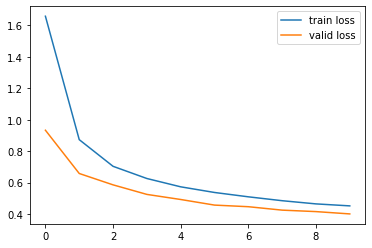

In [94]:
# Plot the train loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(valid_losses, label='valid loss')
plt.legend()
plt.show()

#### Test the network on the test data

In [95]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        # forward pass
        outputs = model(images)
        
        # get prediction
        # torch.max returns both max and argmax
        # dim = 0 max along columns
        # dim = 1 max along rows
        _, predicted = torch.max(outputs.data, dim=1)
        
         # update counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
                                                   100 * correct / total))

Accuracy of the network on the test images: 84 %


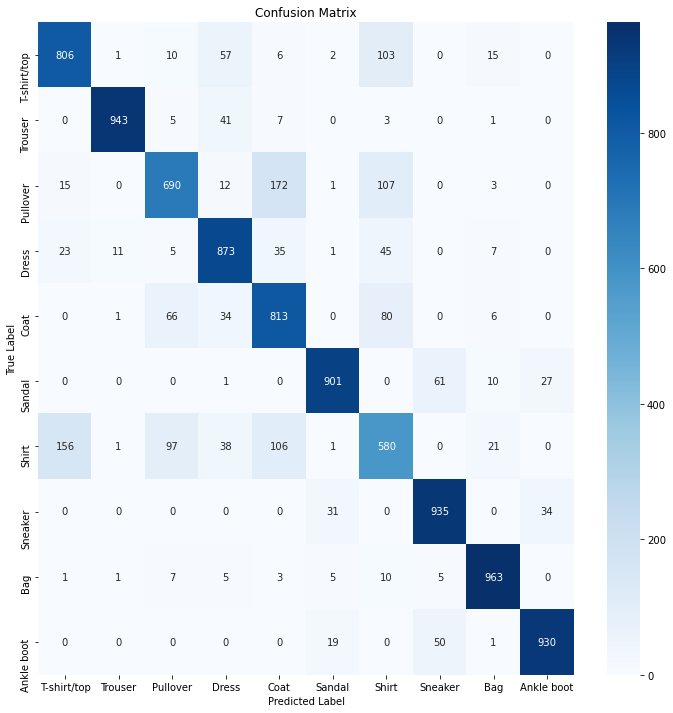

In [96]:
# get all predictions in an array p_test 
y_test = np.array(testset.targets)
p_test = np.array([])

model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Forward pass
        outputs = model(images)

        # Get prediction
        # torch.max returns both max and argmax
        _, predictions = torch.max(outputs, 1)
  
        # update p_test
        p_test = np.concatenate((p_test, predictions.numpy()))
        
# plot confusion matrix        
cm = confusion_matrix(y_test, p_test)
#print(cm)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix")
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
ax.set(ylabel="True Label", xlabel="Predicted Label")
ax.set_xticklabels(testset.classes)
ax.set_yticklabels(testset.classes)
plt.show()

In [97]:
# save the model
PATH='./FashionMNIST-dropout.pth'
torch.save(model.state_dict(), PATH)

# References

Aladdin Persson. (2020, April 9). Pytorch Data Augmentation & Image Transforms Tutorial [Video]. YouTube. https://www.youtube.com/watch?v=Zvd276j9sZ8

AladdinPerzon. (n.d.). Machine Learning Algorithms and Deep learning in Pytorch. GitHub. https://github.com/AladdinPerzon/Machine-Learning-Collection

Androbomb. (2019, December 11). Using CNN to classify images W/PyTorch. Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/androbomb/using-cnn-to-classify-images-w-pytorch

Artificial neural network (ANN) – Learn deep learning with Python. (n.d.). Site not found · GitHub Pages. https://carpentries-incubator.github.io/deep-learning_intro/04-ann/index.html

Bat, A. (2020, February 18). Fashion MNIST data training using PyTorch. Medium. https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-7f6ad71e96f4

Cioloboc, F. (2019, January 4). Ideas on how to fine-tune a pre-trained model in PyTorch. Medium. https://medium.com/udacity-pytorch-challengers/ideas-on-how-to-fine-tune-a-pre-trained-model-in-pytorch-184c47185a20

Convolutional neural network. (2013, August 31). Wikipedia, the free encyclopedia. Retrieved August 15, 2020, from https://en.wikipedia.org/wiki/Convolutional_neural_network

Feedforward deep learning models · UC business analytics R programming guide. (n.d.). UC Business Analytics R Programming Guide ·. https://uc-r.github.io/feedforward_DNN

Godoy, D. (2020, August 6). Understanding PyTorch with an example: A step-by-step tutorial. Medium. https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

Gour, R. (2019, March 5). You must kNo. 20 deep learning terminologies. Medium. https://medium.com/@rinu.gour123/you-must-know-20-deep-learning-terminologies-d164ff027bac

Gugger, S. (n.d.). Convolution in depth. Another data science student's blog. https://sgugger.github.io/convolution-in-depth.html

Gupta, T. (2018, December 16). Deep learning: Feedforward neural network. Medium. https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7

Image kernels explained visually. (n.d.). Explained Visually. https://setosa.io/ev/image-kernels/

Improving neural networks - Hyperparameter tuning, regularization, and more (deeplearning.ai course #2). (2020, July 19). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/11/neural-networks-hyperparameter-tuning-regularization-deeplearning/

Improving neural networks - Hyperparameter tuning, regularization, and more (deeplearning.ai course #2). (2020, July 19). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/11/neural-networks-hyperparameter-tuning-regularization-deeplearning/

Jang, A. E. (2019, May 15). PyTorch: Introduction to neural Network — Feedforward neural network model. Medium. https://medium.com/biaslyai/pytorch-introduction-to-neural-network-feedforward-neural-network-model-e7231cff47cb

Kanncaa1. (2020, April 6). Pytorch tutorial for deep learning lovers. Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

Kumar, N. (2020, February 13). Deep learning best practices: Regularization techniques for better performance of neural network. Medium. https://heartbeat.fritz.ai/deep-learning-best-practices-regularization-techniques-for-better-performance-of-neural-network-94f978a4e518

MIRANDA, L. (2017, August 13). Understanding softmax and the negative log-likelihood. Lj Miranda. https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/

An overview of regularization techniques in deep learning (with Python code). (2020, May 15). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/

PULKIT SHARMA. (2018, October 22). An introductory guide to deep learning and neural networks (Notes from deeplearning.ai course #1). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/10/introduction-neural-networks-deep-learning/

PyTorch Data Augmentation. (n.d.). Google Colaboratory. https://colab.research.google.com/drive/109vu3F1LTzD1gdVV6cho9fKGx7lzbFll#scrollTo=VNvUCPoxLdcH

Raoniar, R. (2020, August 11). Start your CNN journey with PyTorch in Python. Medium. https://towardsdatascience.com/start-your-cnn-journey-with-pytorch-in-python-6f8364a79801

Shafkat, I. (2018, June 7). Intuitively understanding convolutions for deep learning. Medium. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

Subramanian, V. (2018). Deep learning with PyTorch: A practical approach to building neural network models using PyTorch. Packt Publishing.

Understanding Feedforward neural networks. (2017, October 9). Learn OpenCV ( C++ / Python ). https://www.learnopencv.com/understanding-feedforward-neural-networks/

Varma, S., & Das, S. (2018, September 27). Deep learning. SCU Web Page of Sanjiv Ranjan Das. https://srdas.github.io/DLBook/ImprovingModelGeneralization.html#Regularization

Yunjey Choi. (n.d.). PyTorch Tutorial for Deep Learning Researchers. GitHub. https://github.com/yunjey/pytorch-tutorial